In [39]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load all 4 datasheets
account_balance = pd.read_csv('current_account_balance_billionsUSD.csv')
gov_debt = pd.read_csv('government_gross_debt.csv')
inflation = pd.read_csv('inflation_rate.csv')
gdp_growth = pd.read_csv('real_gdp_growth.csv')

# additions

# Global Macroeconomic Health Assessment: Multi-Dimensional Country Analysis

**Comprehensive Framework**: This analysis integrates four critical macroeconomic indicators to assess global economic health patterns across countries and regions. We examine: 

**(1) Current Account Balance** - Measures a country's net trade in goods, services, and investments with the rest of the world. Positive balances indicate export strength and savings surplus, while deficits suggest import dependence or investment attraction. This matters because persistent imbalances can lead to currency instability and debt accumulation.

**(2) Government Debt-to-GDP Ratio** - Shows government borrowing relative to economic output, indicating fiscal sustainability. High ratios may limit policy flexibility and increase borrowing costs, while moderate levels suggest responsible fiscal management crucial for economic stability.

**(3) Inflation Rate** - Reflects price stability and monetary policy effectiveness. Moderate inflation (2-3%) indicates healthy demand, while high inflation erodes purchasing power and low inflation may signal economic weakness. This matters for living standards and investment decisions.

**(4) GDP Growth Rate** - Measures economic expansion and living standard improvements. Sustained growth creates jobs and prosperity, while stagnation or contraction indicates economic problems requiring policy intervention.

Together, these metrics reveal comprehensive economic health patterns and guide policy decisions for sustainable development.

In [12]:
account_balance.head()
#account_balance.info()

,Current account balance\nU.S. dollars (Billions of U.S. dollars),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,-0.008,-2.687,-3.502,no data,no data,no data,no data,no data,no data,no data
2,Albania,0.001,-0.01,-0.052,-0.037,-0.03,-0.027,0.001,0.007,-0.025,...,-1.38,-1.121,-0.285,-0.657,-0.866,-0.907,-0.884,-0.939,-0.982,-1.095
3,Algeria,0.242,-0.209,-0.436,-0.085,0.074,1.015,-2.23,0.141,-1.9,...,-4.512,19.064,5.978,-3.633,-10.504,-12.371,-11.505,-10.977,-9.701,-7.544
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,0.499,0.393,0.538,0.609,0.682,0.706,0.73,0.754,0.781,0.806


In [59]:
# copy dataframe
df1 = account_balance.copy()

# rename column 1 to country name
df1.rename(columns={df1.columns[0]: "country"}, inplace=True)

# remove row 1
df1 = df1.iloc[1:].copy()

# remove last two rows
df1 = df1.iloc[:-2].copy()

# Drop the column whose name is the table descriptor
df1.replace('no data', np.nan, inplace=True)

# replace no data to null: 
df1.replace('no data', np.nan, inplace=True)

# convert all to numeric
for col in df1.columns[1:]:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# strip spaces
df1['country'] = df1['country'].str.strip()

# separate data into countries and regions
region_names = [
    "Africa (Region)", "Asia and Pacific", "Australia and New Zealand", "Caribbean",
    "Central America", "Central Asia and the Caucasus", "East Asia", "Eastern Europe",
    "Europe", "Middle East (Region)", "North Africa", "North America", "Pacific Islands",
    "South America", "South Asia", "Southeast Asia", "Sub-Saharan Africa (Region)",
    "Western Europe", "Western Hemisphere (Region)", "ASEAN-5", "Advanced economies",
    "Emerging and Developing Asia", "Emerging and Developing Europe",
    "Emerging market and developing economies", "Euro area", "European Union",
    "Latin America and the Caribbean", "Major advanced economies (G7)",
    "Middle East and Central Asia", "Other advanced economies", "Sub-Saharan Africa", "World"
]

df1_countries = df1[~df1['country'].isin(region_names)].copy()
df1_regions = df1[df1['country'].isin(region_names)].copy()



In [60]:
df1_countries.tail(5)

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
191,Vietnam,-0.565,-0.739,-0.616,-0.685,-0.980,-0.943,-1.480,-1.388,-0.769,...,-8.150,1.404,25.575,28.047,15.710,9.759,10.311,6.479,5.045,3.133
192,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.778,-2.037,-2.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.696,-3.561,-2.360,-3.368,-2.102,-1.848,-0.968,0.791,0.906,0.880
194,Zambia,-0.589,-0.869,-0.741,-0.329,-0.332,-0.350,-0.286,-0.104,0.015,...,2.630,1.093,-0.838,-0.438,0.131,0.879,1.398,1.470,1.524,1.593
195,Zimbabwe,-0.301,-0.674,-0.748,-0.504,-0.171,-0.153,-0.051,0.000,0.050,...,0.348,0.305,0.135,0.505,1.143,1.210,1.198,1.226,1.120,0.996


In [55]:
print(df1_countries['country'][-5:])


194                          Zambia
195                        Zimbabwe
203                 Eastern Europe 
208                Pacific Islands 
212    Sub-Saharan Africa (Region) 
Name: country, dtype: object


In [63]:
# turn the whole process into a function for all datasets. 
def clean_account_data(df):
    # define regions to separate country and region dataset
    region_names = [
        "Africa (Region)", "Asia and Pacific", "Australia and New Zealand", "Caribbean",
        "Central America", "Central Asia and the Caucasus", "East Asia", "Eastern Europe",
        "Europe", "Middle East (Region)", "North Africa", "North America", "Pacific Islands",
        "South America", "South Asia", "Southeast Asia", "Sub-Saharan Africa (Region)",
        "Western Europe", "Western Hemisphere (Region)", "ASEAN-5", "Advanced economies",
        "Emerging and Developing Asia", "Emerging and Developing Europe",
        "Emerging market and developing economies", "Euro area", "European Union",
        "Latin America and the Caribbean", "Major advanced economies (G7)",
        "Middle East and Central Asia", "Other advanced economies", "Sub-Saharan Africa", "World"
    ]
    
    df = df.iloc[1:-2].copy()  # drop first row (extra header) and last two rows (footnotes)
    df.rename(columns={df.columns[0]: "country"}, inplace=True)
    df['country'] = df['country'].str.lower()
    df.replace('no data', np.nan, inplace=True)
    
    # ensure values are all numeric, orginally stored as an object. 
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # strip spaces
    df['country'] = df['country'].str.strip()

    # separate country and region dataset
    countries_df = df[~df['country'].isin([r.lower() for r in region_names])].copy()
    regions_df = df[df['country'].isin([r.lower() for r in region_names])].copy()
    
    return countries_df, regions_df


## Data Integration & Preprocessing Methodology

**Multi-Dataset Harmonization**: Implementing standardized cleaning procedures across four distinct macroeconomic datasets to ensure analytical consistency. The preprocessing pipeline addresses common data quality issues including missing value handling, regional vs. country separation, data type standardization, and temporal alignment. This systematic approach enables robust cross-dataset comparisons and maintains data integrity throughout the analytical workflow, essential for reliable macroeconomic assessment across diverse economic indicators.

In [67]:
account_countries, account_regions = clean_account_data(account_balance)
debt_countries, debt_regions = clean_account_data(gov_debt)
inflation_countries, inflation_regions = clean_account_data(inflation)
gdp_countries, gdp_regions = clean_account_data(gdp_growth)


In [ ]:
# check it works
account_countries.tail()

# it does !

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
191,vietnam,-0.565,-0.739,-0.616,-0.685,-0.980,-0.943,-1.480,-1.388,-0.769,...,-8.150,1.404,25.575,28.047,15.710,9.759,10.311,6.479,5.045,3.133
192,west bank and gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.778,-2.037,-2.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.696,-3.561,-2.360,-3.368,-2.102,-1.848,-0.968,0.791,0.906,0.880
194,zambia,-0.589,-0.869,-0.741,-0.329,-0.332,-0.350,-0.286,-0.104,0.015,...,2.630,1.093,-0.838,-0.438,0.131,0.879,1.398,1.470,1.524,1.593
195,zimbabwe,-0.301,-0.674,-0.748,-0.504,-0.171,-0.153,-0.051,0.000,0.050,...,0.348,0.305,0.135,0.505,1.143,1.210,1.198,1.226,1.120,0.996


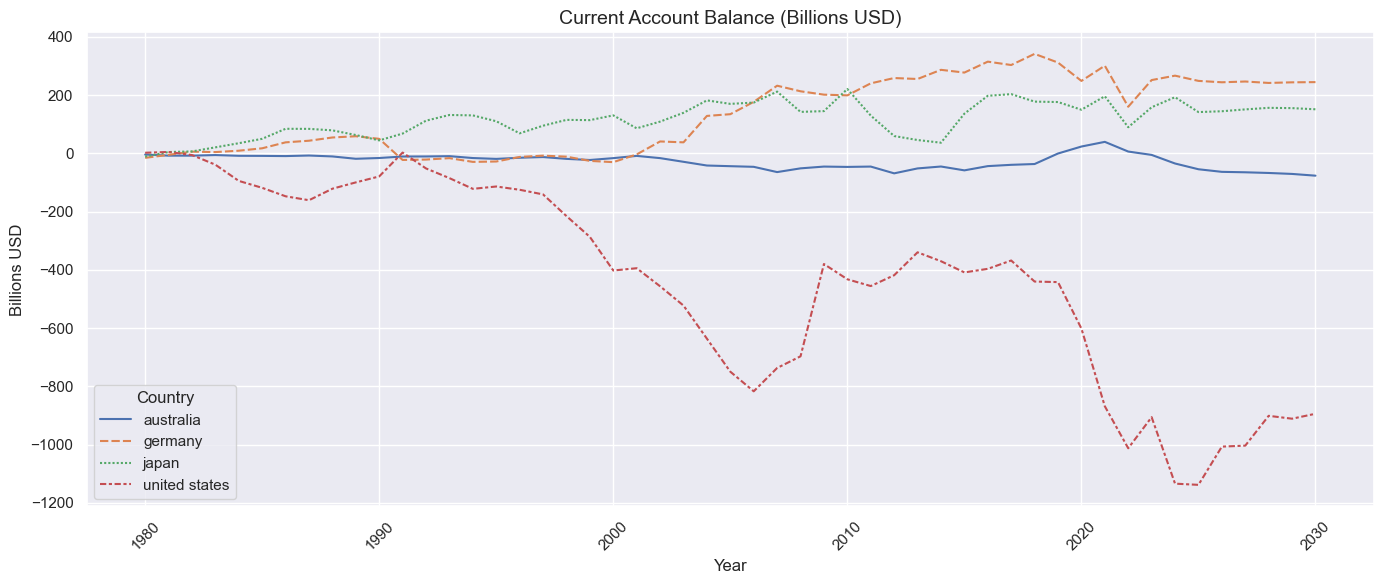

In [73]:
# set theme for following four plots
sns.set_theme(style='darkgrid', context='notebook', palette='deep')

countries = ['united states', 'china', 'germany', 'japan', 'australia']
df_plot = account_countries[account_countries['country'].isin(countries)].set_index('country').T
df_plot.index = df_plot.index.astype(int)

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot)
plt.title('Current Account Balance (Billions USD)', fontsize=14)
plt.ylabel('Billions USD')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()

## Current Account Balance Dynamics: Trade Competitiveness Analysis

**External Balance Assessment**: Current account balance serves as a crucial indicator of a country's external economic relationships, reflecting the net flow of goods, services, and investments. Positive balances indicate export strength and foreign investment attraction, while persistent deficits may signal dependency on foreign capital or consumption-driven growth models. The temporal analysis reveals structural changes in global trade patterns, competitiveness shifts, and responses to major economic events including financial crises and geopolitical developments.

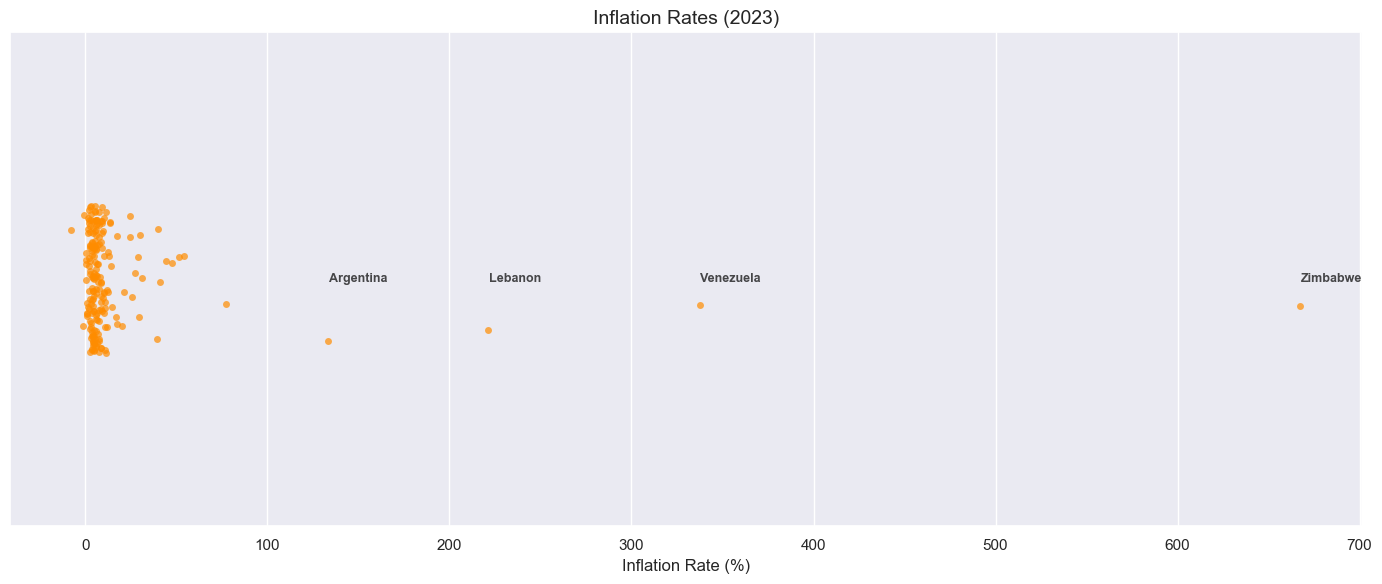

In [89]:
year = '2023'
# Clean data
df_strip = inflation_countries[['country', year]].dropna()
df_strip_sorted = df_strip.sort_values(by=year, ascending=False)

plt.figure(figsize=(14, 6))
sns.stripplot(data=df_strip, x=year, color='darkorange', alpha=0.7, jitter=0.15)
# Annotate Top 10
for i, row in df_strip_sorted.head(4).iterrows():
    plt.text(
        x=row[year] + 0.2,  # slight nudge right
        y=0,
        s=row['country'].title(),
        ha='left',
        va='center',
        fontsize=9,
        fontweight='bold',
        color='black',
        alpha=0.7
    )

plt.title('Inflation Rates (2023)', fontsize=14)
plt.xlabel('Inflation Rate (%)')
plt.tight_layout()


## Inflation Rate Distribution: Monetary Stability Assessment

**Price Stability Landscape**: Inflation rate analysis reveals the effectiveness of monetary policy frameworks and economic stability across countries. The strip plot visualization effectively captures the distribution of inflation experiences, highlighting countries facing hyperinflation challenges versus those maintaining price stability. Extreme inflation cases often indicate underlying structural economic problems, currency instability, or policy failures, while consistently low inflation may signal strong institutional frameworks or deflationary pressures requiring policy attention.

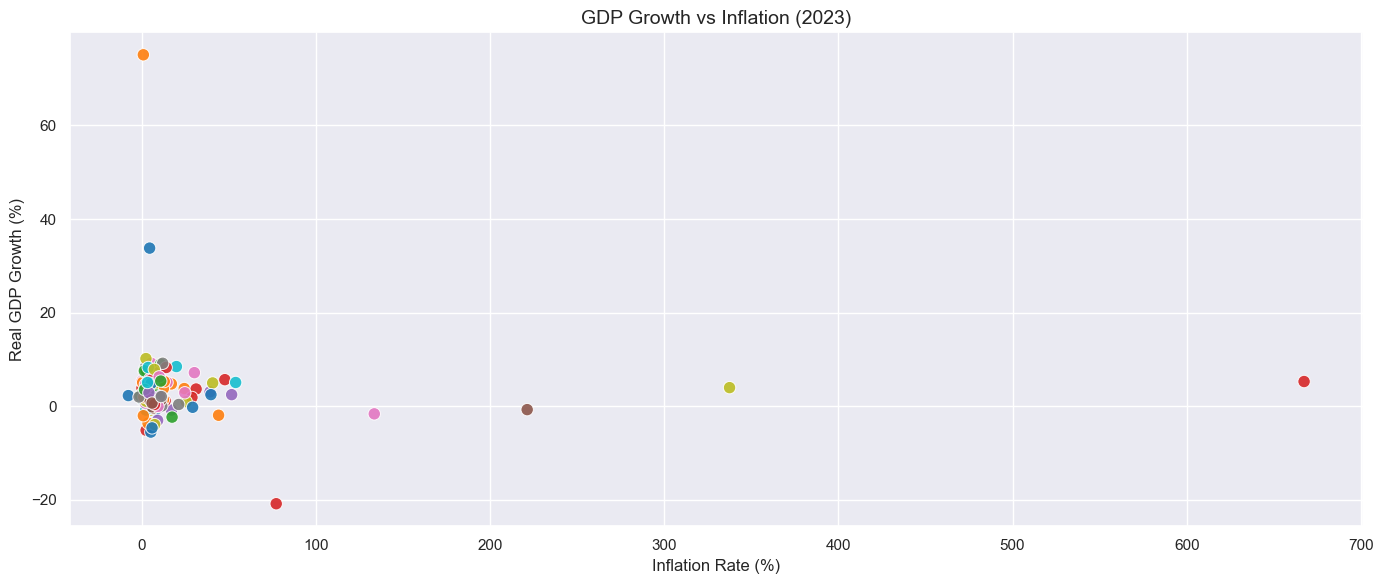

In [93]:
df_merge = pd.merge(
    gdp_countries[['country', year]],
    inflation_countries[['country', year]],
    on='country',
    suffixes=('_gdp', '_infl')
).dropna()

plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df_merge,
    x=f'{year}_infl', y=f'{year}_gdp',
    hue='country',  # Optional: add country colour mapping
    palette='tab10',
    alpha=0.9,
    s=80
)
plt.title('GDP Growth vs Inflation (2023)', fontsize=14)
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Real GDP Growth (%)')
plt.legend([],[], frameon=False)  # hide cluttered legend
plt.tight_layout()


## Growth-Inflation Trade-off: Economic Performance Mapping

**Phillips Curve Dynamics**: The scatter plot analysis examines the classical economic relationship between GDP growth and inflation rates, providing insights into countries' economic performance and policy effectiveness. Countries achieving high growth with low inflation demonstrate optimal economic management, while those experiencing stagflation (low growth, high inflation) face significant policy challenges. This visualization reveals diverse economic experiences and helps identify countries with sustainable growth patterns versus those requiring structural adjustments or policy interventions.

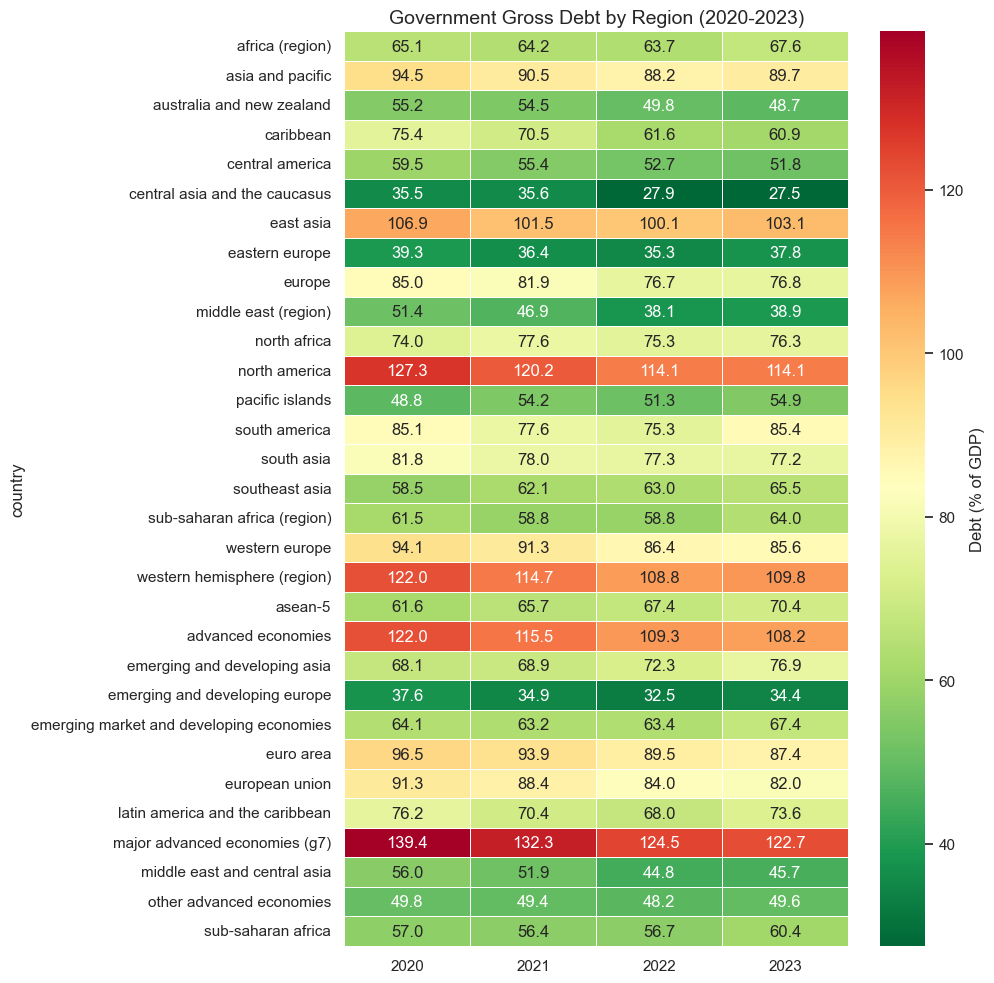

In [79]:
recent_years = ['2020', '2021', '2022', '2023']
df_heat = debt_regions[['country'] + recent_years].set_index('country')

plt.figure(figsize=(10, 10))
sns.heatmap(
    df_heat,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cmap="RdYlGn_r",  # red=high debt, green=low
    cbar_kws={'label': 'Debt (% of GDP)'}
)
plt.title('Government Gross Debt by Region (2020-2023)', fontsize=14)
plt.tight_layout()


## Regional Fiscal Health: Government Debt Sustainability Patterns

**Fiscal Capacity Assessment**: The heatmap visualization provides comprehensive regional comparison of government debt levels relative to GDP, revealing fiscal sustainability patterns across different economic regions. High debt-to-GDP ratios may indicate fiscal stress, reduced policy flexibility, or post-crisis debt accumulation, while moderate levels suggest sustainable fiscal management. Regional patterns often reflect shared economic challenges, institutional frameworks, or responses to global economic shocks, providing insights into regional economic governance and fiscal policy coordination effectiveness.

In [102]:
from scipy.stats import zscore

# Define the range of years
years = [str(y) for y in range(2013, 2024)]

# Prepare datasets with suffixes to avoid column overlap
gdp_avg = gdp_countries[['country'] + years].set_index('country').add_suffix('_gdp')
inflation_avg = inflation_countries[['country'] + years].set_index('country').add_suffix('_infl')
debt_avg = debt_countries[['country'] + years].set_index('country').add_suffix('_debt')
cab_avg = account_countries[['country'] + years].set_index('country').add_suffix('_cab')

# Merge datasets
df = gdp_avg.join(inflation_avg).join(debt_avg).join(cab_avg)

# Compute 10-year averages
df['gdp'] = df[[f"{y}_gdp" for y in years]].mean(axis=1)
df['inflation'] = df[[f"{y}_infl" for y in years]].mean(axis=1)
df['debt'] = df[[f"{y}_debt" for y in years]].mean(axis=1)
df['cab'] = df[[f"{y}_cab" for y in years]].mean(axis=1)

# Clean final frame
df.reset_index(inplace=True)
df = df[['country', 'gdp', 'inflation', 'debt', 'cab']].dropna()

# Identify statistical outliers
df['gdp_z'] = zscore(df['gdp'])
df['inflation_z'] = zscore(df['inflation'])
outliers = df[(df['gdp_z'].abs() > 2) | (df['inflation_z'].abs() > 2)]


## Long-term Economic Pattern Analysis: Decade-Average Performance Metrics

**Temporal Smoothing Methodology**: Implementing 10-year averaging (2013-2023) to capture structural economic patterns while minimizing short-term volatility and cyclical fluctuations. This approach reveals persistent economic characteristics and long-term policy effectiveness rather than temporary shocks or one-time events. Z-score based outlier detection identifies countries with exceptional performance patterns (both positive and negative), enabling focused analysis on extreme cases that may represent either economic success stories or cautionary examples requiring deeper investigation.

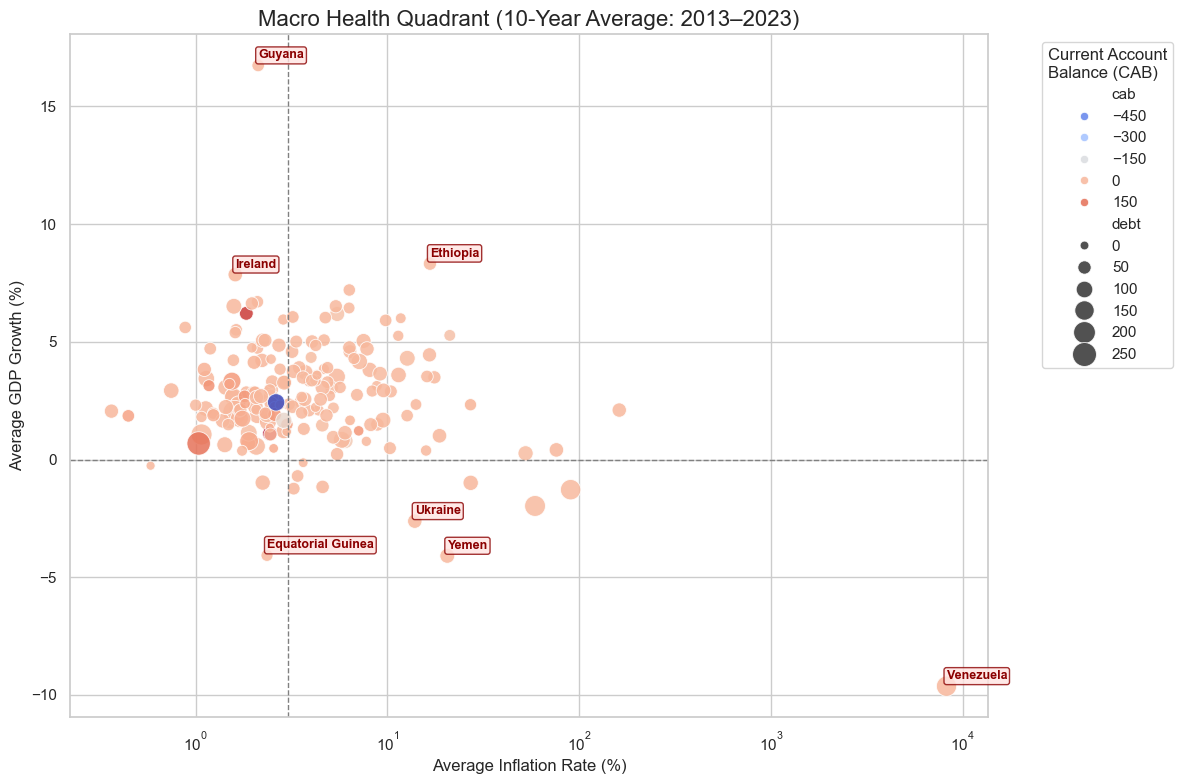

In [103]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='inflation',
    y='gdp',
    size='debt',
    hue='cab',
    palette='coolwarm',
    sizes=(40, 300),
    alpha=0.85
)

# Add crosshairs
plt.axhline(0, color='grey', linestyle='--', lw=1)
plt.axvline(df['inflation'].median(), color='grey', linestyle='--', lw=1)

# Add labels for outliers
for _, row in outliers.iterrows():
    plt.text(
        row['inflation'],
        row['gdp'] + 0.3,
        row['country'].title(),
        color='darkred',
        fontweight='bold',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.2', edgecolor='darkred', facecolor='mistyrose', alpha=0.8)
    )

# Styling
plt.xscale('log')
plt.title('Macro Health Quadrant (10-Year Average: 2013–2023)', fontsize=16)
plt.xlabel('Average Inflation Rate (%)')
plt.ylabel('Average GDP Growth (%)')
plt.legend(title='Current Account\nBalance (CAB)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Macroeconomic Health Quadrant: Integrated Performance Assessment

**Multi-Dimensional Economic Synthesis**: The sophisticated scatter plot combines four critical macroeconomic indicators in a single visualization: GDP growth and inflation (axes), government debt (bubble size), and current account balance (color coding). This integration reveals complex relationships between fiscal health, monetary stability, external balance, and economic growth. Countries in optimal quadrants (high growth, low inflation, sustainable debt, positive current account) represent economic success models, while outliers highlight exceptional cases requiring policy attention.

**Strategic Policy Implications**: The logarithmic inflation scale accommodates extreme cases while maintaining analytical precision for moderate inflation countries. Cross-hair reference lines (median inflation, zero GDP growth) create clear performance quadrants enabling rapid identification of economic health categories.

**Why These Metrics Matter Together**: Current account balance reveals external sustainability - countries cannot run large deficits indefinitely without currency risk. Government debt indicates fiscal space for crisis response and long-term sustainability. Inflation shows monetary policy effectiveness and price stability crucial for business planning. GDP growth measures living standard improvements and job creation. Combined, they provide a complete picture of economic health: countries with strong growth, stable prices, manageable debt, and balanced external accounts demonstrate optimal economic management, while those with poor performance across metrics face significant challenges requiring comprehensive policy reforms.